# Single Particle Lindblad Example: 1D tight-binding chain

Spenser Talkington (spenser@upenn.edu)

Associated paper: Talkington and Claassen, npj Quantum Materials 9, 104 (2024)

Examples for the single particle (quadratic) Lindbladian response formalism. We choose parameters that are non-Nambu ($\Delta=0$, $C=0$) so that the Nambu and non-Nambu calculations give the same (correct) results.

WARNING: one has to be careful (especially with the response functions) with $\pm$ signs, factors of $i$ and $1/\Omega$. This is because where possible I have omitted overall factors.

## Set up Notebook

In [1]:
species = "fermi"
is_nambu = True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["svg"]

if species=="fermi":
    from lindblad_fermi import LindbladianFermiSP as LindbladianSP
elif species=="bose":
    from lindblad_bose import LindbladianBoseSP as LindbladianSP
else:
    raise ValueError("species "+species+" is invalid")

In [3]:
#convergence/range parameters -- these are key for how fast/slow this runs
lim = 10
num = 10**4
num_f = 10**3
res = 100

#k point to consider in the BZ
k = np.array([1.])
# k = np.array([np.random.uniform(-np.pi,np.pi)])

## Model
Two-band Rice-Mele model
$$H(k)=t\cos(k)\sigma^x - t'\sin(k)\sigma^y + m\sigma^z$$

In [4]:
s0 = np.array([[1,0],[0,1]],dtype=complex)
sx = np.array([[0,1],[1,0]],dtype=complex)
sy = np.array([[0,-1j],[1j,0]],dtype=complex)
sz = np.array([[1,0],[0,-1]],dtype=complex)

In [5]:
#model parameters
t = 1.0
dt = 0.2
m = 0.5
h = lambda k : t*np.cos(k[0])*sx - dt*np.sin(k[0])*sy + m*sz
d = lambda k : np.array([[0,0],[0,0]]) #gap function -- zero for non-nambu

G = 1 #dissipation rate

#set up current vertices
if is_nambu:
    s = 2
    jx = lambda k : np.kron(sz, -t*np.sin(k[0])*sx - dt*np.cos(k[0])*sy)
    jdia = lambda k: np.kron(sz, -t*np.cos(k[0])*sx + dt*np.sin(k[0])*sy)
else:
    s = 1
    jx = lambda k : -t*np.sin(k[0])*sx - dt*np.cos(k[0])*sy
    jdia = lambda k: -t*np.cos(k[0])*sx + dt*np.sin(k[0])*sy

#jumps
J1 = lambda k : np.array([0.4,0.3,0.0,0.0]) #random non-nambu jumps
J2 = lambda k : np.array([0.0,0.0,0.2,0.1]) #random non-nambu jumps

#initialize lindbladian
L = LindbladianSP(2,h,d,is_nambu,J1,J2) #2 bands

## Density

When gain rate goes to zero this should go to zero. In the Fermi case when loss rate goes to zero this should go to one (full occupation). In the Bose case, gain cannot exceed the loss rate.

In [6]:
if(species=="fermi"):
    J1_full = lambda k : 0*np.array([0.4,0.3,0.0,0.0]) #random non-nambu jumps
    J2_full = lambda k : np.array([0.0,0.0,0.2,0.1]) #random non-nambu jumps
    L_full = LindbladianSP(2,h,d,is_nambu,J1_full,J2_full) #2 bands
    dens = L_full.density(k,G)
    print("density test (should be ones):\n",np.round(dens,2))

J1_empty = lambda k : np.array([0.4,0.3,0.0,0.0]) #random non-nambu jumps
J2_empty = lambda k : 0*np.array([0.0,0.0,0.2,0.1]) #random non-nambu jumps
L_empty = LindbladianSP(2,h,d,is_nambu,J1_empty,J2_empty) #2 bands
dens = L_empty.density(k,G)
print("density test (should be zeros):\n",np.round(dens,2))

density test (should be ones):
 [[ 1.-0.j -0.-0.j  0.-0.j  0.+0.j]
 [-0.+0.j  1.-0.j -0.+0.j  0.+0.j]
 [ 0.+0.j -0.-0.j -1.+0.j  0.-0.j]
 [ 0.-0.j  0.-0.j  0.-0.j -1.+0.j]]
density test (should be zeros):
 [[ 0.-0.j -0.-0.j -0.+0.j -0.-0.j]
 [-0.+0.j  0.-0.j  0.-0.j -0.-0.j]
 [-0.-0.j  0.+0.j  0.+0.j -0.-0.j]
 [-0.+0.j -0.+0.j -0.-0.j  0.+0.j]]


## Bands

We should have $\mathrm{Im}(\xi)<0$.

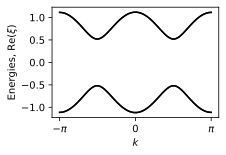

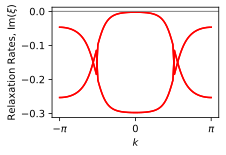

In [7]:
### BAND STRUCTURE ###
ks = np.linspace(-np.pi,np.pi,res)
vals = np.zeros((res,2*s),dtype=complex)
for r in range(0,res,1):
    vals[r] = np.sort(L.eigs(np.array([ks[r],0]),2)[0])

fig = plt.figure(figsize=(3,2))
plt.plot(ks,np.real(vals),c="k")
plt.xlabel(r"$k$")
plt.ylabel(r"Energies, Re($\xi$)")
plt.xticks([-np.pi,0,np.pi],[r"$-\pi$",r"$0$",r"$\pi$"])
plt.show()
plt.close()

fig = plt.figure(figsize=(3,2))
plt.plot(ks,np.imag(vals),c="r")
plt.axhline(0,c="gray",lw=1)
plt.xlabel(r"$k$")
plt.ylabel(r"Relaxation Rates, Im($\xi$)")
plt.xticks([-np.pi,0,np.pi],[r"$-\pi$",r"$0$",r"$\pi$"])
plt.show()
plt.close()

Density at one point in the BZ

density test:
 [[ 0.16-0.j    0.04+0.02j -0.  +0.j   -0.  -0.j  ]
 [ 0.04-0.02j  0.07-0.j    0.  -0.j   -0.  -0.j  ]
 [-0.  -0.j    0.  +0.j   -0.15+0.j   -0.05-0.01j]
 [-0.  +0.j   -0.  +0.j   -0.05+0.01j -0.06+0.j  ]]


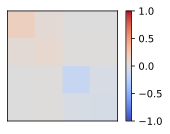

In [8]:
### DENSITY ###
dens = L.density(k,G)
print("density test:\n",np.round(dens,2))

fig = plt.figure(figsize=(3,2))
plt.imshow(np.real(dens),vmin=-1,vmax=1,cmap="coolwarm",interpolation=None)
plt.colorbar()
plt.xticks([],[])
plt.yticks([],[])
plt.show()

Spectral function at one point in BZ: $\int d\omega\ A(\omega) = 2$ for the non-Nambu case and $4$ for the Nambu case

In [9]:
### SPECTRAL FUNCTION ###
Ws = np.linspace(-lim,lim,num)
spectrals = np.zeros(num)
for w in range(1,num,1):
    spectrals[w] = L.spectral(k,G,Ws[w])
print("Int A(w) =",np.sum(spectrals)*2*lim/num)

Int A(w) = 3.9803952504410764


## Response

Both linear and non-linear satisfy Kramers-Kronig relations

In [10]:
def kk(freqs,dat):
    # Kramers-Kronig relations
    # add a minus sign in front to convert real part to imag, or leave as is to convert imag part to real
    sep = (freqs[1]-freqs[0])/2
    return 1/np.pi * np.einsum("v,vw->w",dat,1/(freqs[None,:]-freqs[:,None]+sep)) * (freqs[-1]-freqs[0])/np.shape(freqs)[0]

In [11]:
w = 3. #fix one frequency for the non-linear response

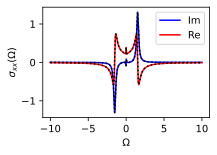

In [12]:
### LINEAR RESPONSE ###
fig = plt.figure(figsize=(3,2))
para = 1j*L.paramagnetic(jx,jx,Ws,k,G)
plt.plot(Ws,np.real(para),c="b",label="Im")
plt.plot(Ws,np.imag(para),c="r",label="Re")
plt.plot(Ws,kk(Ws,np.imag(para)),c="k",ls="dotted")
plt.plot(Ws,-kk(Ws,np.real(para)),c="k",ls="dotted")
plt.legend()
plt.xlabel(r"$\Omega$")
plt.ylabel(r"$\sigma_{xx}(\Omega)$")
plt.show()
plt.close()

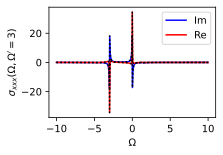

In [13]:
### NON-LINEAR RESPONSE ###
fig = plt.figure(figsize=(3,2))
shift = L.triangle(jx,jx,jx,Ws,w*np.ones(np.shape(Ws)),k,G)
plt.plot(Ws,np.real(shift),c="b",label="Im")
plt.plot(Ws,np.imag(shift),c="r",label="Re")
plt.plot(Ws,-kk(Ws,np.imag(shift)),c="k",ls="dotted")
plt.plot(Ws,kk(Ws,np.real(shift)),c="k",ls="dotted")
plt.xlabel(r"$\Omega$")
plt.ylabel(r"$\sigma_{xxx}(\Omega,\Omega'=3)$")
plt.legend()
plt.show()
plt.close()

## Postulated f-sum rule

The integral over all frequencies $\Pi_\mathrm{para}^{xx} = \int d\Omega\ \frac{i}{\Omega}\Pi_\mathrm{para}^{xx}(\Omega)$ gives an ``integrated spectral weight". This calculation here checks whether the contour integral was done properly.

In [14]:
### PARAMAGNETIC INTEGRAL ###
para = -1j*L.paramagnetic(jx,jx,Ws,k,G)
integrated = -1j*L.paramagnetic_integrated(jx,jx,k,G)
print("discrete para sum:",np.sum(para/Ws)*2*lim/num)
print("para integrated  :",integrated)

discrete para sum: (-1.225822036563761-1.2274625760255732e-15j)
para integrated  : (-1.2260830148257609-2.2322358387255243e-14j)


In npj Quantum Materials 9, 104 (2024), we conjectured (but were unable to prove) a $f$-sum rule: $\int d\Omega\ \sigma^\mathrm{xx}_\mathrm{para}=2\pi\langle j^{xx}_\mathrm{dia}\rangle$.

In [15]:
### DIAMAGNETIC AND F-SUM RULE ###
ks = np.linspace(-np.pi,np.pi,num_f)
para = np.zeros(num_f,dtype=complex)
dia = np.zeros(num_f,dtype=complex)
for i in range(num_f):
    para[i] = L.paramagnetic_integrated(jx,jx,np.array([ks[i]]),G)
    dia[i] = L.diamagnetic(jdia,np.array([ks[i]]),G)
print("Im(dia)/Re(para) =",2*np.pi*np.sum(np.real(dia))/np.imag(np.sum(para)))

Im(dia)/Re(para) = 1.002249767689292
